In [1]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import gdown


file_id = "1FhRfojbTy6j8YKSRGwyArKjUzjGVsaXj"
url = f"https://drive.google.com/uc?id={file_id}"

output = "telecom_churn_dataset.csv"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1FhRfojbTy6j8YKSRGwyArKjUzjGVsaXj
To: /content/telecom_churn_dataset.csv
100%|██████████| 79.2M/79.2M [00:01<00:00, 73.5MB/s]


'telecom_churn_dataset.csv'

In [3]:
dataframe = pd.read_csv("telecom_churn_dataset.csv")
dataframe.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
variables_needed = [
    'mobile_number', 'circle_id', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9',
    'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9',
    'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9',
    'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_og_mou_9',
    'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_ic_mou_9',
    'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9',
    'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9',
    'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
    'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'last_day_rch_amt_9',
    'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
    'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
    'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
    'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_2g_mb_9',
    'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'vol_3g_mb_9',
    'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9',
    'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9',
    'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9',
    'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9',
    'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9',
    'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9',
    'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9',
    'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
    'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'
]

dataframe = dataframe[variables_needed]

dataframe.head()


,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,34.047,355.074,268.321,86.285,0.0,0.00,0.00,0.00,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,167.690,189.058,210.226,290.714,0.0,0.00,0.00,38.49,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,221.338,251.102,508.054,389.500,0.0,54.86,44.38,0.00,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,261.636,309.876,238.174,163.426,0.0,0.00,0.00,0.00,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
missing_values = dataframe.isnull().sum()
missing_percentage = (missing_values / len(dataframe)) * 100

missing_data = pd.DataFrame({
    'Missing_values': missing_values,
    'Missing_Percentage': missing_percentage
}).sort_values(by='Missing_Percentage', ascending=False)

missing_data[missing_data['Missing_values'] > 0]

,Missing_values,Missing_Percentage
fb_user_6,74846,74.846748
night_pck_user_6,74846,74.846748
arpu_3g_6,74846,74.846748
arpu_2g_6,74846,74.846748
av_rech_amt_data_6,74846,74.846748
max_rech_data_6,74846,74.846748
total_rech_data_6,74846,74.846748
av_rech_amt_data_7,74428,74.428744
total_rech_data_7,74428,74.428744
max_rech_data_7,74428,74.428744


In [6]:
fill_with_zero = [col for col in dataframe.columns if col.startswith(('fb_user_', 'night_pck_user_'))]
dataframe[fill_with_zero] = dataframe[fill_with_zero].fillna(0)
fill_with_median = [col for col in dataframe.columns if col.startswith((
    'arpu_2g_', 'arpu_3g_', 'max_rech_data_', 'av_rech_amt_data_', 'total_rech_data_'))]
dataframe[fill_with_median] = dataframe[fill_with_median].fillna(dataframe[fill_with_median].median())

In [8]:
roaming_columns = [col for col in dataframe.columns if col.startswith(('roam_ic_mou_', 'roam_og_mou_'))]
dataframe[roaming_columns] = dataframe[roaming_columns].fillna(0)

In [9]:
dataframe.head(15)

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,...,0,1.0,1.0,1.0,0.0,968,30.40,0.00,101.20,3.58
1,7001865778,109,34.047,355.074,268.321,86.285,0.00,0.00,0.00,0.00,...,0,0.0,1.0,1.0,0.0,1006,0.00,0.00,0.00,0.00
2,7001625959,109,167.690,189.058,210.226,290.714,0.00,0.00,0.00,38.49,...,0,0.0,0.0,0.0,1.0,1103,0.00,0.00,4.17,0.00
3,7001204172,109,221.338,251.102,508.054,389.500,0.00,54.86,44.38,0.00,...,0,0.0,0.0,0.0,0.0,2491,0.00,0.00,0.00,0.00
4,7000142493,109,261.636,309.876,238.174,163.426,0.00,0.00,0.00,0.00,...,0,0.0,0.0,0.0,0.0,1526,0.00,0.00,0.00,0.00
5,7000286308,109,50.258,58.810,83.386,170.826,0.00,0.00,0.00,0.00,...,0,0.0,0.0,0.0,0.0,1471,0.00,0.00,0.00,0.00
6,7001051193,109,429.023,190.704,255.114,114.751,0.00,0.00,0.00,0.00,...,0,0.0,0.0,0.0,0.0,1673,0.00,0.00,0.00,0.00
7,7000701601,109,1069.180,1349.850,3171.480,500.000,16.23,33.49,31.64,0.00,...,0,0.0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00
8,7001524846,109,378.721,492.223,137.362,166.787,0.00,0.00,0.00,0.00,...,0,0.0,1.0,1.0,0.0,315,21.03,910.65,122.16,0.00
9,7001864400,109,119.518,247.435,170.231,160.042,0.00,0.00,0.00,0.00,...,0,0.0,1.0,0.0,0.0,902,0.00,0.00,0.00,0.00


In [10]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
arpu_6,99999.0,2.829874e+02,328.439770,-2.258709e+03,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.785366e+02,338.156291,-2.014045e+03,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.791547e+02,344.474791,-9.458080e+02,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
...,...,...,...,...,...,...,...,...
aon,99999.0,1.219855e+03,954.733842,1.800000e+02,4.670000e+02,8.630000e+02,1.807500e+03,4.337000e+03
aug_vbc_3g,99999.0,6.817025e+01,267.580450,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.291622e+04
jul_vbc_3g,99999.0,6.683906e+01,271.201856,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.165600e+03
jun_vbc_3g,99999.0,6.002120e+01,253.938223,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.116621e+04


In [12]:
negative_arpu = dataframe[(dataframe['arpu_6'] < 0) | (dataframe['arpu_7'] < 0) | (dataframe['arpu_8'] < 0) | (dataframe['arpu_9'] < 0)]
print(f"Data with negative ARPU Rows: {len(negative_arpu)}")

Data with negative ARPU Rows: 2133


In [13]:
arpu_cols = ['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9']
for col in arpu_cols:
    dataframe[col] = dataframe[col].apply(lambda x: 0 if x < 0 else x)


In [14]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
arpu_6,99999.0,2.830959e+02,328.187736,0.000000e+00,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.786829e+02,337.881891,0.000000e+00,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.792119e+02,344.407694,0.000000e+00,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
...,...,...,...,...,...,...,...,...
aon,99999.0,1.219855e+03,954.733842,1.800000e+02,4.670000e+02,8.630000e+02,1.807500e+03,4.337000e+03
aug_vbc_3g,99999.0,6.817025e+01,267.580450,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.291622e+04
jul_vbc_3g,99999.0,6.683906e+01,271.201856,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.165600e+03
jun_vbc_3g,99999.0,6.002120e+01,253.938223,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.116621e+04


/tmp/ipython-input-938710080.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[col], ax=axs[i//2, i%2], shade=True)
/tmp/ipython-input-938710080.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[col], ax=axs[i//2, i%2], shade=True)
/tmp/ipython-input-938710080.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[col], ax=axs[i//2, i%2], shade=True)
/tmp/ipython-input-938710080.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[col], ax=axs[i//2, i%2], shad

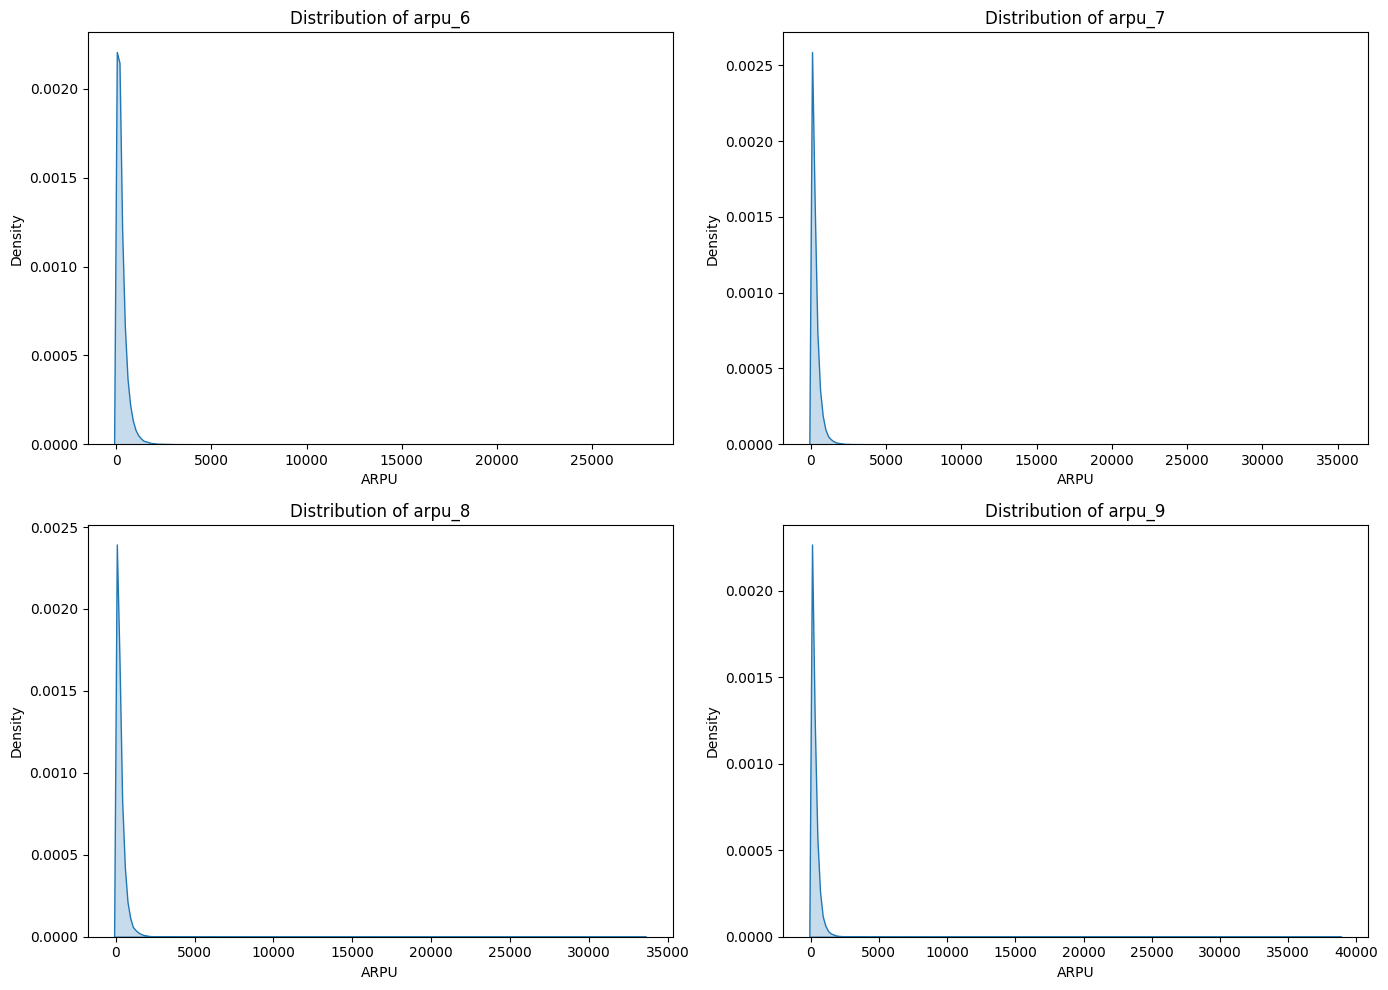

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(14,10))

arpu_cols = ['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9']
for i, col in enumerate(arpu_cols):
    sns.kdeplot(dataframe[col], ax=axs[i//2, i%2], shade=True)
    axs[i//2, i%2].set_title(f'Distribution of {col}')
    axs[i//2, i%2].set_xlabel('ARPU')

plt.tight_layout()
plt.show()

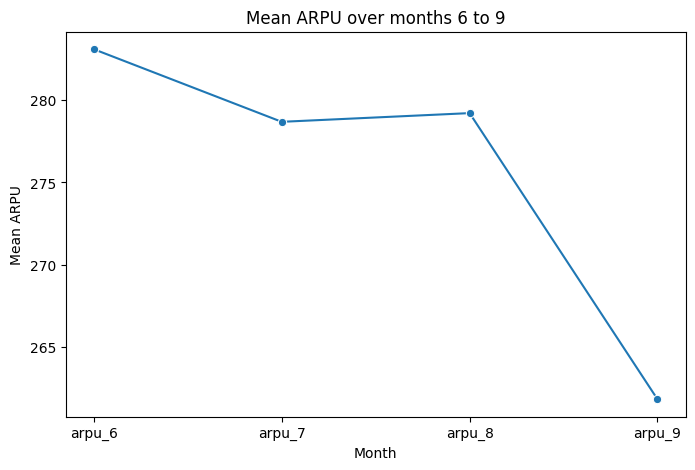

In [18]:
arpu_means = dataframe[arpu_cols].mean()

plt.figure(figsize=(8,5))
sns.lineplot(x=arpu_cols, y=arpu_means.values, marker='o')
plt.title('Mean ARPU over months 6 to 9')
plt.xlabel('Month')
plt.ylabel('Mean ARPU')
plt.show()


In [ ]:
rech_cols = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9']

rech_means = dataframe[rech_cols].mean()

plt.figure(figsize=(8,5))
sns.lineplot(x=rech_cols, y=rech_means.values, marker='o')
plt.title('Mean Total Recharge Amount Over Months')
plt.xlabel('Month')
plt.ylabel('Mean Recharge Amount')
plt.show()


In [22]:
dataframe['churn'] = dataframe['total_rech_amt_9'].apply(lambda x: 1 if x == 0 else 0)


In [23]:
print(dataframe['churn'].value_counts(normalize=True))

churn
0    0.820438
1    0.179562
Name: proportion, dtype: float64


In [25]:
print('churn' in dataframe.columns)


[ch for ch in dataframe.columns if 'churn' in ch.lower()]


True


['churn']

In [27]:
dataframe[dataframe['churn'] == 1].head(20)


,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000842753,109,197.385,214.816,213.803,21.10,0.00,0.00,0.00,0.00,...,1.0,1.0,1.0,0.0,968,30.40,0.00,101.20,3.58,1
7,7000701601,109,1069.180,1349.850,3171.480,500.00,16.23,33.49,31.64,0.00,...,0.0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,1
11,7002006969,109,298.126,21.000,131.617,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,1.0,0.0,339,0.00,0.00,0.00,0.00,1
22,7001121249,109,281.076,26.291,0.000,0.30,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,396,0.00,0.00,0.00,0.00,1
28,7001604038,109,117.392,85.967,109.042,36.90,0.00,0.00,0.00,0.00,...,0.0,0.0,1.0,0.0,502,0.36,0.00,0.00,0.00,1
29,7000039512,109,147.460,22.460,0.000,0.10,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,263,0.00,0.00,0.00,0.00,1
32,7000382876,109,60.651,22.064,52.380,0.00,0.00,0.00,0.00,0.00,...,1.0,1.0,0.0,0.0,229,0.00,0.00,0.00,0.00,1
35,7002108620,109,596.376,13.448,0.000,0.00,196.49,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,2036,0.00,0.00,0.00,0.00,1
45,7002388962,109,247.064,7.500,0.000,0.00,25.48,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,740,0.00,0.00,0.00,0.00,1
47,7001482006,109,31.180,72.510,32.660,94.57,0.00,0.00,0.00,0.00,...,1.0,0.0,0.0,1.0,3105,484.63,355.68,378.77,48.51,1


In [30]:
#  Use June to August features
feature_months = ['_6', '_7', '_8']
X = dataframe[[col for col in dataframe.columns if any(m in col for m in feature_months)]]
y = dataframe['churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
import numpy as np


month_list = ['_6', '_7', '_8']
seq_features = sorted(set([col[:-2] for col in X.columns]))

# Build sequences
sequences = []
for _, row in dataframe.iterrows():
    user_seq = []
    for m in month_list:
        features = [row[feat + m] for feat in seq_features]
        user_seq.append(features)
    sequences.append(user_seq)

X_seq = np.array(sequences)
y_seq = dataframe['churn'].values


In [38]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Layer
from tensorflow.keras.models import Model

# Attention Layer
class Attention(Layer):
    def __init__(self):
        super(Attention, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1), initializer="random_normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1), initializer="zeros")
        super(Attention, self).build(input_shape)

    def call(self, inputs):

        score = tf.nn.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * inputs
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector


inputs = Input(shape=(X_seq.shape[1], X_seq.shape[2]))
lstm_out = LSTM(64, return_sequences=True)(inputs)
attention_out = Attention()(lstm_out)
output = Dense(1, activation='sigmoid')(attention_out)

model = Model(inputs=inputs, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
from sklearn.utils import class_weight
import numpy as np

weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_seq), y=y_seq)
class_weights = {i: weights[i] for i in range(len(weights))}

history = model.fit(X_seq, y_seq, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8384 - loss: 0.3793 - val_accuracy: 0.8644 - val_loss: 0.3339
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8714 - loss: 0.3241 - val_accuracy: 0.8680 - val_loss: 0.3288
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8698 - loss: 0.3240 - val_accuracy: 0.8659 - val_loss: 0.3295
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8698 - loss: 0.3218 - val_accuracy: 0.8658 - val_loss: 0.3292
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8699 - loss: 0.3217 - val_accuracy: 0.8659 - val_loss: 0.3278
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8712 - loss: 0.3172 - val_accuracy: 0.8656 - val_loss: 0.3253
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8705 - loss: 0.3187 - val_accuracy: 0.8676 - val_loss: 0.3239
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8710 - loss: 0.3199 

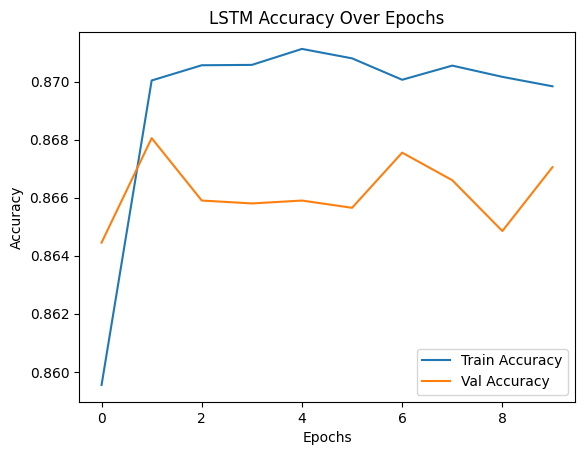

In [51]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("LSTM Accuracy Over Epochs")
plt.show()


In [40]:
from sklearn.metrics import classification_report


y_pred_probs = model.predict(X_seq)

y_pred = (y_pred_probs > 0.5).astype(int)


print(classification_report(y_seq, y_pred))


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     82043
           1       0.73      0.44      0.55     17956

    accuracy                           0.87     99999
   macro avg       0.81      0.70      0.74     99999
weighted avg       0.86      0.87      0.86     99999



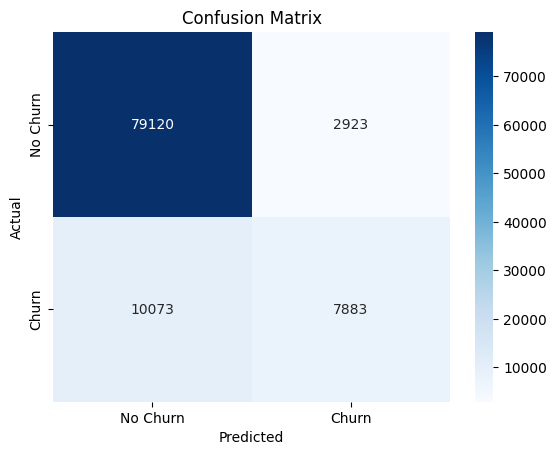

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_seq, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


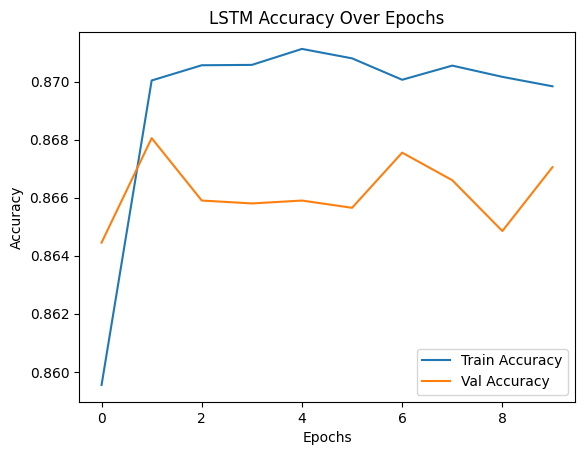

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("LSTM Accuracy Over Epochs")
plt.show()


In [43]:
!pip install torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.7 MB/s eta 0:00:00


In [56]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch_geometric.data import Data
from torch_geometric.nn import SAGEConv
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = torch.tensor(X_scaled, dtype=torch.float)


k = 10
nn_model = NearestNeighbors(n_neighbors=k+1, metric='cosine')
nn_model.fit(X_scaled)
distances, indices = nn_model.kneighbors(X_scaled)

edge_index = []
for i, neighbors in enumerate(indices):
    for j in neighbors[1:]:
        edge_index.append([i, j])
edge_index = torch.tensor(edge_index, dtype=torch.long).t()


data = Data(x=X_scaled, edge_index=edge_index)


data.y = torch.tensor(y, dtype=torch.long)
num_nodes = data.num_nodes
data.train_mask = torch.zeros(num_nodes, dtype=torch.bool)
data.test_mask = torch.zeros(num_nodes, dtype=torch.bool)

perm = torch.randperm(num_nodes)
train_size = int(0.2 * num_nodes)
data.train_mask[perm[:train_size]] = True
data.test_mask[perm[train_size:]] = True


In [57]:
class GraphSAGE(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(input_dim, hidden_dim)
        self.conv2 = SAGEConv(hidden_dim, hidden_dim)
        self.classifier = nn.Linear(hidden_dim, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.classifier(x)
        return x


In [58]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

train_accuracies = []
val_accuracies = []

for epoch in range(1, 51):
    model.train()
    optimizer.zero_grad()
    out = model(data)

    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()


    model.eval()
    with torch.no_grad():
        _, train_pred = out[data.train_mask].max(dim=1)
        train_acc = (train_pred == data.y[data.train_mask]).sum().item() / data.train_mask.sum().item()

        _, val_pred = out[data.test_mask].max(dim=1)
        val_acc = (val_pred == data.y[data.test_mask]).sum().item() / data.test_mask.sum().item()

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    print(f"Epoch {epoch:02d}, Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")


AttributeError: 'Functional' object has no attribute 'train'

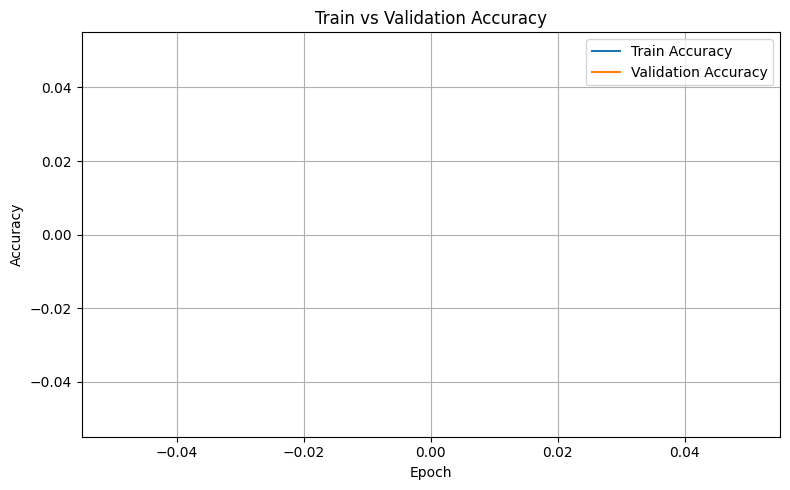

In [47]:
plt.figure(figsize=(8, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [55]:
model.eval()
with torch.no_grad():
    out = model(data)
    y_true = data.y[data.test_mask].cpu()
    y_pred = out[data.test_mask].argmax(dim=1).cpu()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


AttributeError: 'Functional' object has no attribute 'eval'